<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/cluster/cluster_karate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

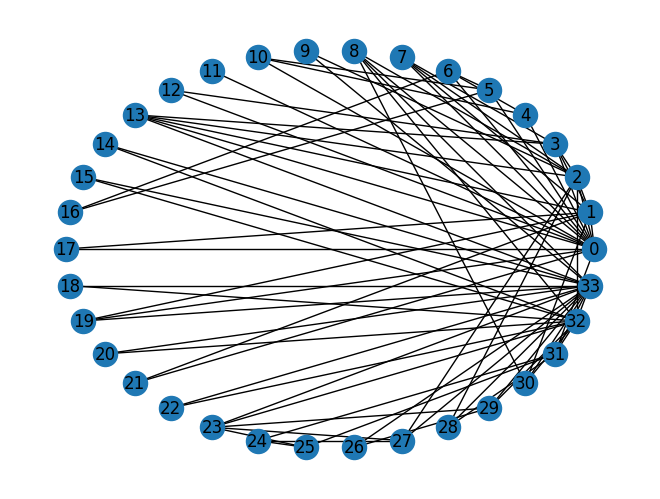

[[0 4 5 ... 2 0 0]
 [4 0 6 ... 0 0 0]
 [5 6 0 ... 0 2 0]
 ...
 [2 0 0 ... 0 4 4]
 [0 0 2 ... 4 0 5]
 [0 0 0 ... 4 5 0]]


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.karate_club_graph()

#G.remove_nodes_from(range(10,G.number_of_nodes()))   #work on a smaller subset?

nx.draw_circular(G, with_labels=True)
plt.show()

A = nx.adjacency_matrix(G)
A_dense = A.todense()
print(A_dense)

In [2]:
#Adj matrix is sparse, but AgglomerativeClustering wants a dense/full matrix
G.number_of_edges()


78

In [3]:
Big_connection_weight = A_dense.max()

In [4]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters = 2, affinity = "precomputed", linkage = "average")
clustering.fit(Big_connection_weight - A_dense)   #Big_connection_weight - A simply flips the entries of A
# so that the distance of two vertices is computed to be a low number if there is a strong edge between them.
# And, set to a high number if there is no edge between them.

print(clustering.labels_)


[1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


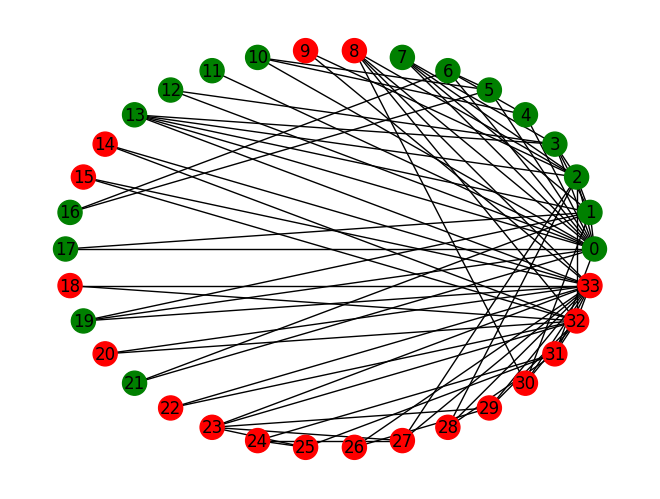

In [5]:
cluster_color = {0:'r', 1:'g', 2:'b'}

if False:     #if you like to build the colors list with append.
  colors = []
  for i,v in enumerate(G.nodes):
    color = cluster_color[clustering.labels_[i]]
    colors.append(color)
else:
  colors = [cluster_color[clustering.labels_[i]] for i,v in enumerate(G.nodes)]
  #instead of range(34), I used enumerate just in case
  #because that would be definitely matching with the order of nodes used in the adjacency matrix

nx.draw_circular(G, with_labels=True, node_color=colors)
plt.show()
